# Google Play Store
## Team Group 8 
* This data set is located in  https://github.com/gauthamp10/Google-Playstore-Dataset
* We will assist Google in determining which applications work best on their platform in order to increase user engagement.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import statistics as stats
import matplotlib.pyplot as plt 
import statistics as stats
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
import scipy as sp 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,auc

In [2]:
df=pd.read_csv('Master file final.csv')

In [3]:
df.head()

,Unnamed: 0,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,2020.0,2020,Everyone,https://beniyizibyose.tk/projects/,False,False,False,6/15/2021 20:19
1,1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,...,https://webserveis.netlify.app/,webserveis@gmail.com,2020.0,2021,Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,6/15/2021 20:19
2,2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,...,NaN,vnacrewit@gmail.com,2019.0,2019,Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,6/15/2021 20:19
3,3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,2018.0,2018,Everyone,NaN,True,False,False,6/15/2021 20:19
4,4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,2020.0,2018,Everyone,http://www.horodyski.com.pl,False,False,False,6/15/2021 20:19


## Descriptive Analysis

### Number of columns and rows

In [4]:
#Number of columns and rows
print('Rows:',list(df.shape)[0])
print('Columns:',list(df.shape)[1])

Rows: 2312944
Columns: 25


### Percent of missing values by Columns

In [5]:
# % of missing values by columbs
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
Unnamed: 0,Unnamed: 0,0.000000
App Name,App Name,0.000086
App Id,App Id,0.000000
Category,Category,0.000000
Rating,Rating,0.989345
Rating Count,Rating Count,0.989345
Installs,Installs,0.004626
Minimum Installs,Minimum Installs,0.004626
Maximum Installs,Maximum Installs,0.000000
Free,Free,0.000000


### Mean, Standard Deviation, Min and Max using Descriptive Statistics

In [6]:
#Summary statistics
df.describe()

,Unnamed: 0,Rating,Rating Count,Minimum Installs,Maximum Installs,Price,Released,Last Updated
count,2.312944e+06,2.290061e+06,2.290061e+06,2.312837e+06,2.312944e+06,2.312944e+06,2.241891e+06,2.312944e+06
mean,1.156472e+06,2.203152e+00,2.864839e+03,1.834452e+05,3.202017e+05,1.034992e-01,2.018169e+03,2.019458e+03
std,6.676896e+05,2.106223e+00,2.121626e+05,1.513144e+07,2.355495e+07,2.633127e+00,2.146142e+00,1.575108e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.010000e+03,2.009000e+03
25%,5.782358e+05,0.000000e+00,0.000000e+00,5.000000e+01,8.400000e+01,0.000000e+00,2.017000e+03,2.019000e+03
50%,1.156472e+06,2.900000e+00,6.000000e+00,5.000000e+02,6.950000e+02,0.000000e+00,2.019000e+03,2.020000e+03
75%,1.734707e+06,4.300000e+00,4.200000e+01,5.000000e+03,7.354000e+03,0.000000e+00,2.020000e+03,2.021000e+03
max,2.312943e+06,5.000000e+00,1.385576e+08,1.000000e+10,1.205763e+10,4.000000e+02,2.021000e+03,2.021000e+03


### Median

In [7]:
#Medians of each numerical variable
pd.DataFrame(df.median()).rename(columns={0:'Median_Value'})

C:\Users\alex0\AppData\Local\Temp/ipykernel_26260/1931601074.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  pd.DataFrame(df.median()).rename(columns={0:'Median_Value'})


,Median_Value
Unnamed: 0,1156471.5
Rating,2.9
Rating Count,6.0
Minimum Installs,500.0
Maximum Installs,695.0
Free,1.0
Price,0.0
Released,2019.0
Last Updated,2020.0
Ad Supported,0.0


### Mode

In [8]:
#Modes of each variable

modes = []
for i in list(df.columns):
    modes.append([i,list(df[i].mode())[0]])

df_modes = pd.DataFrame(modes).rename(columns={0:'Variable',1:'Mode'}).set_index(keys='Variable')
df_modes

,Mode
Variable,
Unnamed: 0,0
App Name,Tic Tac Toe
App Id,Age.checker.jp
Category,Education
Rating,0.0
Rating Count,0.0
Installs,100+
Minimum Installs,100.0
Maximum Installs,3


### Variance

In [9]:
#Variance of each variable
variances = []
df_gpdescribe = pd.DataFrame(df.describe())
for i in df_gpdescribe.columns:
    variances.append([i,pow(list(df_gpdescribe[i])[2],2)])

df_variances = pd.DataFrame(variances).rename(columns={0:'Variable',1:'Variance'}).set_index(keys='Variable')
df_variances

,Variance
Variable,
Unnamed: 0,4.458094e+11
Rating,4.436173e+00
Rating Count,4.501296e+10
Minimum Installs,2.289604e+14
Maximum Installs,5.548359e+14
Price,6.933355e+00
Released,4.605927e+00
Last Updated,2.480966e+00


### Correlation Matrix

In [10]:
df.corr()

,Unnamed: 0,Rating,Rating Count,Minimum Installs,Maximum Installs,Free,Price,Released,Last Updated,Ad Supported,In App Purchases,Editors Choice
Unnamed: 0,1.000000,-0.000600,0.000179,0.001141,0.001067,0.000778,0.000405,-0.000453,-0.000265,-0.000792,-0.000637,0.000279
Rating,-0.000600,1.000000,0.013038,0.011214,0.012615,-0.010756,-0.003674,-0.246686,-0.017599,0.160502,0.153820,0.019485
Rating Count,0.000179,0.013038,1.000000,0.545281,0.547571,0.001410,-0.000411,-0.023040,0.009790,0.005294,0.025737,0.137311
Minimum Installs,0.001141,0.011214,0.545281,1.000000,0.954037,0.001623,-0.000461,-0.019973,0.008367,0.002250,0.014179,0.059932
Maximum Installs,0.001067,0.012615,0.547571,0.954037,1.000000,0.001815,-0.000515,-0.022415,0.009337,0.002882,0.016101,0.064206
Free,0.000778,-0.010756,0.001410,0.001623,0.001815,1.000000,-0.278831,0.137050,0.101877,0.123617,0.008669,-0.003157
Price,0.000405,-0.003674,-0.000411,-0.000461,-0.000515,-0.278831,1.000000,-0.031449,-0.017518,-0.034276,-0.002634,0.000503
Released,-0.000453,-0.246686,-0.023040,-0.019973,-0.022415,0.137050,-0.031449,1.000000,0.529928,0.049614,-0.063600,-0.020052
Last Updated,-0.000265,-0.017599,0.009790,0.008367,0.009337,0.101877,-0.017518,0.529928,1.000000,0.014380,0.062256,0.016147
Ad Supported,-0.000792,0.160502,0.005294,0.002250,0.002882,0.123617,-0.034276,0.049614,0.014380,1.000000,0.138312,0.005702


## Data cleaning and processing

<AxesSubplot:>

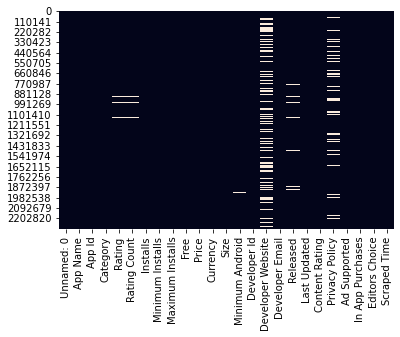

In [11]:
#Data visualization of missing values 
sns.heatmap(df.isnull(),cbar=False)

In [12]:
# Creating a table of df type. null values and unique values for better visualization
def printinfo():
    temp = pd.DataFrame(index= df.columns)
    temp['data_type'] = df.dtypes
    temp['null_count'] =df.isnull().sum()
    temp['unique_count'] = df.nunique()
    return temp

In [13]:
printinfo()

,data_type,null_count,unique_count
Unnamed: 0,int64,0,2312944
App Name,object,2,2177830
App Id,object,0,2312944
Category,object,0,48
Rating,float64,22883,42
Rating Count,float64,22883,38482
Installs,object,107,22
Minimum Installs,float64,107,22
Maximum Installs,int64,0,251563
Free,bool,0,2


#### From this point of view we consider that size category should be numeric

### Fixing Size

### We observe: 
* Metabytes 
* Kilobyte
* Gigabyte
* Varies with device
### We will transform all data to Metabytes

In [14]:
for i in df['Size']:
    if type(i)==float:
        pass
    elif i[-1]=='k':
        pass
    elif i[-1]=='M':
        pass
    elif i=='Varies with device':
        pass
    else:
        print(i)

1.5G
1.1G
1.0G
1.1G
1.5G
1.1G
1.1G
1.1G
1.1G
1.1G
1.0G
1.1G
1.0G


In [15]:
x=[]
for i in df['Size']:
    if type(i)==float:
        i=i
    elif i=='Varies with device':
        i=np.nan
    elif i[-1]=='M':
        i=float(i[:-1].replace(',',''))
    elif i[-1]=='k':
        i=(float(i[:-1].replace(',','')))/1024
    elif i[-1]=='G':
        i=(float(i[:-1]))*1024
    x.append(i)

In [16]:
df['Size']=np.array(x)
df['Size']

0          10.0
1           2.9
2           3.7
3           1.8
4           6.2
           ... 
2312939    77.0
2312940    44.0
2312941    29.0
2312942    10.0
2312943     5.2
Name: Size, Length: 2312944, dtype: float64

In [17]:
printinfo()

,data_type,null_count,unique_count
Unnamed: 0,int64,0,2312944
App Name,object,2,2177830
App Id,object,0,2312944
Category,object,0,48
Rating,float64,22883,42
Rating Count,float64,22883,38482
Installs,object,107,22
Minimum Installs,float64,107,22
Maximum Installs,int64,0,251563
Free,bool,0,2


### Fixing Install Columns

In [18]:
df['Installs']

0               10+
1            5,000+
2               50+
3               10+
4              100+
             ...   
2312939    100,000+
2312940        100+
2312941        100+
2312942      1,000+
2312943        100+
Name: Installs, Length: 2312944, dtype: object

#### We can observe it contains a + at the end. We proceed to erase it

In [19]:
#Removing + at the end of installs
df['Installs']=df['Installs'].str.replace(r"[^a-zA-Z\d\_]+","")

C:\Users\alex0\AppData\Local\Temp/ipykernel_26260/2719299075.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Installs']=df['Installs'].str.replace(r"[^a-zA-Z\d\_]+","")


In [20]:
#Identifying NaN values in Installs in order to transform it to numeric variable
print(df[df['Installs'].isnull()])

         Unnamed: 0                          App Name  \
5622           5622  Claire’s Café: Tasty Cuisine 🥞🧁🍔   
43569         43569                      Potato Smash   
60888         60888    SketchBook : Draw Art & Paints   
64322         64322      Shared grocery Shopping List   
91391         91391                        NBA NOW 21   
...             ...                               ...   
2161180     2161180                          DEEMO II   
2170210     2170210   Lendor - Share & Rent Anything!   
2205663     2205663               Local 24h Motorista   
2212570     2212570                       Mitrasphere   
2311821     2311821    DreamWorks Universe of Legends   

                                                  App Id         Category  \
5622                                   com.gamehouse.cc1           Casual   
43569                      com.igg.android.projectpotato         Strategy   
60888                       com.sketchbook.illustrations     Art & Design   
64322  

In [21]:
#Removing all non-numeric variables
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')

In [22]:
#Removing all rows with Nan
df = df.dropna(subset=['Installs'])

In [23]:
#Transforming Installs 
df['Installs']=df['Installs'].astype('int64')

In [24]:
printinfo()

,data_type,null_count,unique_count
Unnamed: 0,int64,0,2312837
App Name,object,2,2177725
App Id,object,0,2312837
Category,object,0,48
Rating,float64,22776,42
Rating Count,float64,22776,38482
Installs,int64,0,22
Minimum Installs,float64,0,22
Maximum Installs,int64,0,251556
Free,bool,0,2


### Installs has been sucessfuly change into int

## Transforming Minimum Installs into Int

In [25]:
df.head()

,Unnamed: 0,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10,10.0,15,True,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,2020.0,2020,Everyone,https://beniyizibyose.tk/projects/,False,False,False,6/15/2021 20:19
1,1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,5000,5000.0,7662,True,...,https://webserveis.netlify.app/,webserveis@gmail.com,2020.0,2021,Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,6/15/2021 20:19
2,2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50,50.0,58,True,...,NaN,vnacrewit@gmail.com,2019.0,2019,Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,6/15/2021 20:19
3,3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10,10.0,19,True,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,2018.0,2018,Everyone,NaN,True,False,False,6/15/2021 20:19
4,4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100,100.0,478,True,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,2020.0,2018,Everyone,http://www.horodyski.com.pl,False,False,False,6/15/2021 20:19


In [26]:
#Transforming minimum Installs
df['Minimum Installs']=df['Minimum Installs'].astype('int64')

In [27]:
df.head()

,Unnamed: 0,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10,10,15,True,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,2020.0,2020,Everyone,https://beniyizibyose.tk/projects/,False,False,False,6/15/2021 20:19
1,1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,5000,5000,7662,True,...,https://webserveis.netlify.app/,webserveis@gmail.com,2020.0,2021,Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,6/15/2021 20:19
2,2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50,50,58,True,...,NaN,vnacrewit@gmail.com,2019.0,2019,Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,6/15/2021 20:19
3,3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10,10,19,True,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,2018.0,2018,Everyone,NaN,True,False,False,6/15/2021 20:19
4,4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100,100,478,True,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,2020.0,2018,Everyone,http://www.horodyski.com.pl,False,False,False,6/15/2021 20:19


## Dropping Numerical Variables with Zero variance

In [28]:
# Checks if there is any variables with zero variance
df.std()

C:\Users\alex0\AppData\Local\Temp/ipykernel_26260/500058482.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.std()


Unnamed: 0          6.676891e+05
Rating              2.106223e+00
Rating Count        2.121626e+05
Installs            1.513144e+07
Minimum Installs    1.513144e+07
Maximum Installs    2.355550e+07
Free                1.380647e-01
Price               2.633187e+00
Size                2.404647e+01
Released            2.146144e+00
Last Updated        1.575112e+00
Ad Supported        4.999940e-01
In App Purchases    2.780544e-01
Editors Choice      1.920092e-02
dtype: float64

In [29]:
# Drops variables with 0 variance
df = df.drop(df.std()[df.std() == 0].index, axis = 1) 

C:\Users\alex0\AppData\Local\Temp/ipykernel_26260/3618133775.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.drop(df.std()[df.std() == 0].index, axis = 1)
C:\Users\alex0\AppData\Local\Temp/ipykernel_26260/3618133775.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.drop(df.std()[df.std() == 0].index, axis = 1)


In [30]:
# Checks if there is any variables with zero variance
df.std() 

C:\Users\alex0\AppData\Local\Temp/ipykernel_26260/1266546241.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.std()


Unnamed: 0          6.676891e+05
Rating              2.106223e+00
Rating Count        2.121626e+05
Installs            1.513144e+07
Minimum Installs    1.513144e+07
Maximum Installs    2.355550e+07
Free                1.380647e-01
Price               2.633187e+00
Size                2.404647e+01
Released            2.146144e+00
Last Updated        1.575112e+00
Ad Supported        4.999940e-01
In App Purchases    2.780544e-01
Editors Choice      1.920092e-02
dtype: float64

#### We have not found numerical variables with zero variance

### Dropping Categorical Variables with Zero variance

In [31]:
#Reviewing the colums
columns = df.columns
columns

Index(['Unnamed: 0', 'App Name', 'App Id', 'Category', 'Rating',
       'Rating Count', 'Installs', 'Minimum Installs', 'Maximum Installs',
       'Free', 'Price', 'Currency', 'Size', 'Minimum Android', 'Developer Id',
       'Developer Website', 'Developer Email', 'Released', 'Last Updated',
       'Content Rating', 'Privacy Policy', 'Ad Supported', 'In App Purchases',
       'Editors Choice', 'Scraped Time'],
      dtype='object')

In [32]:
df.head()

,Unnamed: 0,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10,10,15,True,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,2020.0,2020,Everyone,https://beniyizibyose.tk/projects/,False,False,False,6/15/2021 20:19
1,1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,5000,5000,7662,True,...,https://webserveis.netlify.app/,webserveis@gmail.com,2020.0,2021,Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,6/15/2021 20:19
2,2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50,50,58,True,...,NaN,vnacrewit@gmail.com,2019.0,2019,Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,6/15/2021 20:19
3,3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10,10,19,True,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,2018.0,2018,Everyone,NaN,True,False,False,6/15/2021 20:19
4,4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100,100,478,True,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,2020.0,2018,Everyone,http://www.horodyski.com.pl,False,False,False,6/15/2021 20:19


In [33]:
 #Looking for Categorical columns missing values
    
categorical_var = list(set(df.dtypes[df.dtypes == object].index) - set(['Free'])) #appended categorical items that were showing as numerical for some reason
categorical_var

['Content Rating',
 'Minimum Android',
 'Developer Email',
 'Category',
 'Developer Id',
 'Privacy Policy',
 'Currency',
 'App Id',
 'App Name',
 'Scraped Time',
 'Developer Website']

In [34]:
zero_cardinality = []    

for i in categorical_var: # for each categorical variables
    if len(df[i].value_counts().index) == 1: # check how many levels it has and if it is one
        zero_cardinality.append(i) # the variable has zero variance as the cardinality is one 
        # append it to the list of categorical variables with zero variation
        
df = df.drop(zero_cardinality, axis = 1)

In [35]:
zero_cardinality

[]

#### We have not found categorical variables with zero cardinality

### Dropping Categorical Variables with Many Levels

In [36]:
#High_cardinality - Variables with more than 50000 values 
high_cardinality = [] 
for i in categorical_var: # for each categorical variables
    if len(df[i].value_counts().index) > 50000: # check how many levels it has and if it is more
        high_cardinality.append(i) # than 50000, variable has many levels
        # so append it to the list of categorical variables with high cardinality
        
print(high_cardinality)

['Developer Email', 'Developer Id', 'Privacy Policy', 'App Id', 'App Name', 'Developer Website']


#### We consider that App Id and App Name are important and we have decide not to drop them

In [37]:
# Drops variables with high cardinality
df = df.drop(columns=['Developer Id', 'Developer Website', 'Privacy Policy', 'Developer Email','Scraped Time', 'Unnamed: 0'])

#### We have also decided to drop Scraped Time and Unamed 0 since it does not contribute to our analysis 

### Filling numerical variables with their mean

In [38]:
df.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10,10,15,True,0.0,USD,10.0,7.1 and up,2020.0,2020,Everyone,False,False,False
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,5000,5000,7662,True,0.0,USD,2.9,5.0 and up,2020.0,2021,Everyone,True,False,False
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50,50,58,True,0.0,USD,3.7,4.0.3 and up,2019.0,2019,Everyone,False,False,False
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10,10,19,True,0.0,USD,1.8,4.0.3 and up,2018.0,2018,Everyone,True,False,False
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100,100,478,True,0.0,USD,6.2,4.1 and up,2020.0,2018,Everyone,False,False,False


In [39]:
df.columns

Index(['App Name', 'App Id', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Minimum Installs', 'Maximum Installs', 'Free', 'Price', 'Currency',
       'Size', 'Minimum Android', 'Released', 'Last Updated', 'Content Rating',
       'Ad Supported', 'In App Purchases', 'Editors Choice'],
      dtype='object')

In [40]:
printinfo()

,data_type,null_count,unique_count
App Name,object,2,2177725
App Id,object,0,2312837
Category,object,0,48
Rating,float64,22776,42
Rating Count,float64,22776,38482
Installs,int64,0,22
Minimum Installs,int64,0,22
Maximum Installs,int64,0,251556
Free,bool,0,2
Price,float64,0,1063


In [41]:
#Looking for True numerical columns missing values

numerical_var = set(df.columns) - set(df.dtypes[df.dtypes == object].index)
numerical_var = list(numerical_var - set(['In App Purchases','Editors Choice','Ad Supported','Free'])) #the attributes describe here are categorical and that is the reason I am adding them here
numerical_var

['Size',
 'Minimum Installs',
 'Price',
 'Rating',
 'Installs',
 'Released',
 'Rating Count',
 'Last Updated',
 'Maximum Installs']

In [42]:
#Filling Missing Values for numerical variables

df[numerical_var] = df[numerical_var].fillna(df[numerical_var].median(), inplace = False)

In [43]:
printinfo()

,data_type,null_count,unique_count
App Name,object,2,2177725
App Id,object,0,2312837
Category,object,0,48
Rating,float64,0,42
Rating Count,float64,0,38482
Installs,int64,0,22
Minimum Installs,int64,0,22
Maximum Installs,int64,0,251556
Free,bool,0,2
Price,float64,0,1063


In [44]:
df.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10,10,15,True,0.0,USD,10.0,7.1 and up,2020.0,2020,Everyone,False,False,False
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,5000,5000,7662,True,0.0,USD,2.9,5.0 and up,2020.0,2021,Everyone,True,False,False
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50,50,58,True,0.0,USD,3.7,4.0.3 and up,2019.0,2019,Everyone,False,False,False
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10,10,19,True,0.0,USD,1.8,4.0.3 and up,2018.0,2018,Everyone,True,False,False
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100,100,478,True,0.0,USD,6.2,4.1 and up,2020.0,2018,Everyone,False,False,False


### Filling categorical variables with their mode

In [45]:
 #Looking for Categorical columns missing values
    
categorical_var = list(set(df.dtypes[df.dtypes == object].index) - set(['Free'])) #appended categorical items that were showing as numerical for some reason
categorical_var

['Content Rating',
 'Minimum Android',
 'Category',
 'Currency',
 'App Id',
 'App Name']

In [46]:
# Fills in the missing values in categorical columns with mode
# and overwrites the result into the esxisting dataset
df[categorical_var] = df[categorical_var].fillna(df[categorical_var].mode(), inplace = False)

In [47]:
printinfo()

,data_type,null_count,unique_count
App Name,object,2,2177725
App Id,object,0,2312837
Category,object,0,48
Rating,float64,0,42
Rating Count,float64,0,38482
Installs,int64,0,22
Minimum Installs,int64,0,22
Maximum Installs,int64,0,251556
Free,bool,0,2
Price,float64,0,1063


In [48]:
df.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10,10,15,True,0.0,USD,10.0,7.1 and up,2020.0,2020,Everyone,False,False,False
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,5000,5000,7662,True,0.0,USD,2.9,5.0 and up,2020.0,2021,Everyone,True,False,False
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50,50,58,True,0.0,USD,3.7,4.0.3 and up,2019.0,2019,Everyone,False,False,False
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10,10,19,True,0.0,USD,1.8,4.0.3 and up,2018.0,2018,Everyone,True,False,False
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100,100,478,True,0.0,USD,6.2,4.1 and up,2020.0,2018,Everyone,False,False,False


### Dropping missing values

In [49]:
df.dropna(inplace=True)   #dropping missing values for analysis purposes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2306277 entries, 0 to 2312943
Data columns (total 19 columns):
 #   Column            Dtype  
---  ------            -----  
 0   App Name          object 
 1   App Id            object 
 2   Category          object 
 3   Rating            float64
 4   Rating Count      float64
 5   Installs          int64  
 6   Minimum Installs  int64  
 7   Maximum Installs  int64  
 8   Free              bool   
 9   Price             float64
 10  Currency          object 
 11  Size              float64
 12  Minimum Android   object 
 13  Released          float64
 14  Last Updated      int64  
 15  Content Rating    object 
 16  Ad Supported      bool   
 17  In App Purchases  bool   
 18  Editors Choice    bool   
dtypes: bool(4), float64(5), int64(4), object(6)
memory usage: 290.3+ MB


In [50]:
# Checks the number of missing values by column
[sum(df[i].isnull()) for i in df.columns] 

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

### Remove duplicates Using App Id

In [51]:
df.duplicated(subset=['App Id'])

0          False
1          False
2          False
3          False
4          False
           ...  
2312939    False
2312940    False
2312941    False
2312942    False
2312943    False
Length: 2306277, dtype: bool

In [52]:
df.drop_duplicates(subset=['App Id'])

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10,10,15,True,0.0,USD,10.0,7.1 and up,2020.0,2020,Everyone,False,False,False
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,5000,5000,7662,True,0.0,USD,2.9,5.0 and up,2020.0,2021,Everyone,True,False,False
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50,50,58,True,0.0,USD,3.7,4.0.3 and up,2019.0,2019,Everyone,False,False,False
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10,10,19,True,0.0,USD,1.8,4.0.3 and up,2018.0,2018,Everyone,True,False,False
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100,100,478,True,0.0,USD,6.2,4.1 and up,2020.0,2018,Everyone,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312939,大俠客—熱血歸來,com.rxsj.ssjj,Role Playing,4.3,16775.0,100000,100000,337109,True,0.0,USD,77.0,4.1 and up,2019.0,2021,Teen,False,False,False
2312940,ORU Online,com.threedream.oruonline,Education,0.0,0.0,100,100,430,True,0.0,USD,44.0,4.1 and up,2018.0,2018,Everyone,False,False,False
2312941,Data Structure,datastructure.appoworld.datastucture,Education,0.0,0.0,100,100,202,True,0.0,USD,29.0,5.0 and up,2018.0,2018,Everyone,False,False,False
2312942,Devi Suktam,ishan.devi.suktam,Music & Audio,3.5,8.0,1000,1000,2635,True,0.0,USD,10.0,5.0 and up,2016.0,2021,Everyone,True,False,False


In [53]:
#Number of columns and rows
print('Rows:',list(df.shape)[0])
print('Columns:',list(df.shape)[1])

Rows: 2306277
Columns: 19


### Data analysis

### Check for outliners

In [54]:
#Transforming Released into float
df['Released']=df['Released'].astype('float')

#Transforming Released into integrer
df['Released']=df['Released'].astype('int64')

In [55]:
#Identifying numeric vairables 

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

df_numeric = df.select_dtypes(include=numerics)
df_numeric

,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Price,Size,Released,Last Updated
0,0.0,0.0,10,10,15,0.0,10.0,2020,2020
1,4.4,64.0,5000,5000,7662,0.0,2.9,2020,2021
2,0.0,0.0,50,50,58,0.0,3.7,2019,2019
3,5.0,5.0,10,10,19,0.0,1.8,2018,2018
4,0.0,0.0,100,100,478,0.0,6.2,2020,2018
...,...,...,...,...,...,...,...,...,...
2312939,4.3,16775.0,100000,100000,337109,0.0,77.0,2019,2021
2312940,0.0,0.0,100,100,430,0.0,44.0,2018,2018
2312941,0.0,0.0,100,100,202,0.0,29.0,2018,2018
2312942,3.5,8.0,1000,1000,2635,0.0,10.0,2016,2021


In [56]:
#Indentify Interquartile Range
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

#Create DataFrame that identifies outliers variables based on Interquartile Range.
#Outlier values are indicated by 'True'
df_gpoutliers = (df_numeric < (Q1 - 1.5 * IQR)) | (df_numeric > (Q3 + 1.5 * IQR))
df_gpoutliers

Rating                 4.3
Rating Count          41.0
Installs            4950.0
Minimum Installs    4950.0
Maximum Installs    7294.0
Price                  0.0
Size                  18.9
Released               3.0
Last Updated           2.0
dtype: float64


,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Price,Size,Released,Last Updated
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
2312939,False,True,True,True,True,False,True,False,False
2312940,False,False,False,False,False,False,False,False,False
2312941,False,False,False,False,False,False,False,False,False
2312942,False,False,False,False,False,False,False,False,False


In [57]:
#Summarize the number of Outliers in each variable
outliers = []
for i in list(df_gpoutliers.columns):
    outliers.append([i, sum(list(df_gpoutliers[i]))])

df_outliercount = pd.DataFrame(outliers).rename(columns={0:'Variable',1:'Outlier_QTY'}).set_index(keys='Variable')

outlier_percentage = []
for i in list(df_gpoutliers.columns):
    outlier_percentage.append([sum(list(df_gpoutliers[i]))/len(list(df[i]))])
    
df_outliercount['Outlier_QTY_Percentage'] = outlier_percentage

df_outliercount

,Outlier_QTY,Outlier_QTY_Percentage
Variable,,
Rating,0,[0.0]
Rating Count,394086,[0.17087539788152073]
Installs,260175,[0.11281168740788726]
Minimum Installs,260175,[0.11281168740788726]
Maximum Installs,406488,[0.1762528959010561]
Price,44655,[0.019362374944553496]
Size,175246,[0.07598653587578595]
Released,44639,[0.019355437356397345]
Last Updated,65719,[0.028495709752124312]


<AxesSubplot:xlabel='Installs'>

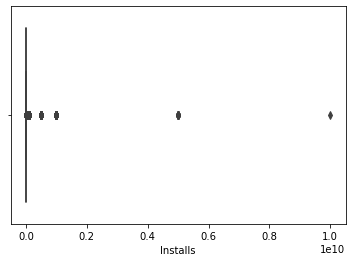

In [58]:
#Visual representation of outliers in Installs
import seaborn as sns
sns.boxplot(x=df['Installs'])

<AxesSubplot:xlabel='Maximum Installs'>

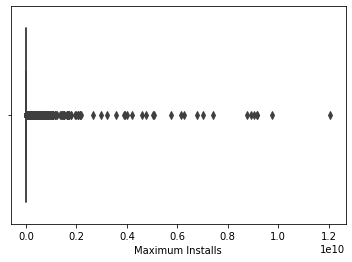

In [59]:
#Visual representation of outliers in Maximum Installs
import seaborn as sns
sns.boxplot(x=df['Maximum Installs'])

<AxesSubplot:xlabel='Rating Count'>

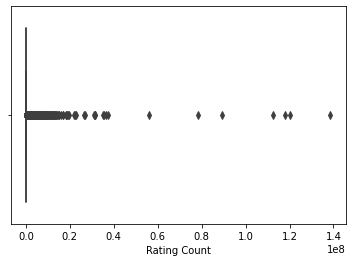

In [60]:
#Visual representation of outliers in Rating Count
import seaborn as sns
sns.boxplot(x=df['Rating Count'])

### Data Visualization

In [61]:
df.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10,10,15,True,0.0,USD,10.0,7.1 and up,2020,2020,Everyone,False,False,False
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,5000,5000,7662,True,0.0,USD,2.9,5.0 and up,2020,2021,Everyone,True,False,False
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50,50,58,True,0.0,USD,3.7,4.0.3 and up,2019,2019,Everyone,False,False,False
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10,10,19,True,0.0,USD,1.8,4.0.3 and up,2018,2018,Everyone,True,False,False
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100,100,478,True,0.0,USD,6.2,4.1 and up,2020,2018,Everyone,False,False,False


<AxesSubplot:xlabel='Free', ylabel='Maximum Installs'>

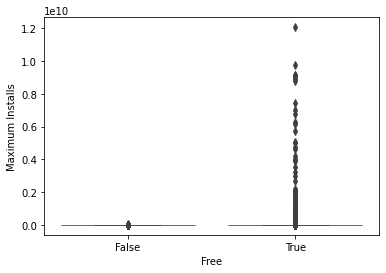

In [62]:
#Visualization of Maximum Installvs vs Free
sns.boxplot(x= 'Free',y='Maximum Installs',data = df[['Free','Maximum Installs']],linewidth=.5)

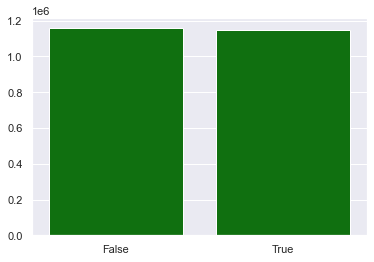

In [63]:
#desrciptive analysis of application which supports Advertisements vs application which does not support advertisement 
df['Ad Supported'].value_counts().index 
df['Ad Supported'].value_counts().values

sns.set(style = 'darkgrid')
ax = sns.barplot(x=df['Ad Supported'].value_counts().index,
                 y=df['Ad Supported'].value_counts().values,
                 color='green')

In [64]:
#data statistics
df.describe()


,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Price,Size,Released,Last Updated
count,2.306277e+06,2.306277e+06,2.306277e+06,2.306277e+06,2.306277e+06,2.306277e+06,2.306277e+06,2.306277e+06,2.306277e+06
mean,2.211968e+00,2.843197e+03,1.829638e+05,1.829638e+05,3.192259e+05,1.033682e-01,1.888370e+01,2.018193e+03,2.019455e+03
std,2.096920e+00,2.114151e+05,1.513728e+07,1.513728e+07,2.356353e+07,2.634975e+00,2.365517e+01,2.118095e+00,1.576298e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.125000e-03,2.010000e+03,2.009000e+03
25%,0.000000e+00,0.000000e+00,5.000000e+01,5.000000e+01,8.400000e+01,0.000000e+00,5.100000e+00,2.017000e+03,2.019000e+03
50%,2.900000e+00,6.000000e+00,5.000000e+02,5.000000e+02,6.970000e+02,0.000000e+00,1.000000e+01,2.019000e+03,2.020000e+03
75%,4.300000e+00,4.100000e+01,5.000000e+03,5.000000e+03,7.378000e+03,0.000000e+00,2.400000e+01,2.020000e+03,2.021000e+03
max,5.000000e+00,1.385576e+08,1.000000e+10,1.000000e+10,1.205763e+10,4.000000e+02,1.536000e+03,2.021000e+03,2.021000e+03


In [65]:
df['Content Rating'].value_counts()

Everyone           2016121
Teen                195970
Mature 17+           60134
Everyone 10+         33764
Unrated                154
Adults only 18+        134
Name: Content Rating, dtype: int64

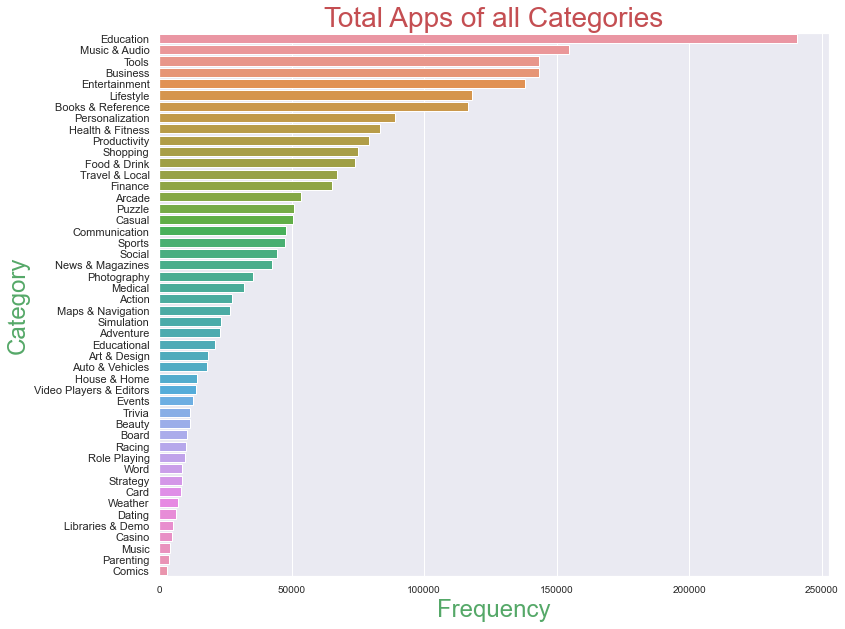

In [66]:
# We noticed that the categories with the most apps are: Education, Music & Audio and Tools
# We noticed that the cateogires with the least apps are: Parenting and Comics
plt.figure(figsize=(12,10))
most_cat = df['Category'].value_counts()
sns.barplot(x=most_cat, y=most_cat.index, data=df)
plt.xticks(size=10)
plt.xlabel("Frequency",size=24,c="g")
plt.ylabel("Category",size=24,c="g")
plt.title("Total Apps of all Categories",size=28,c="r")
plt.show()

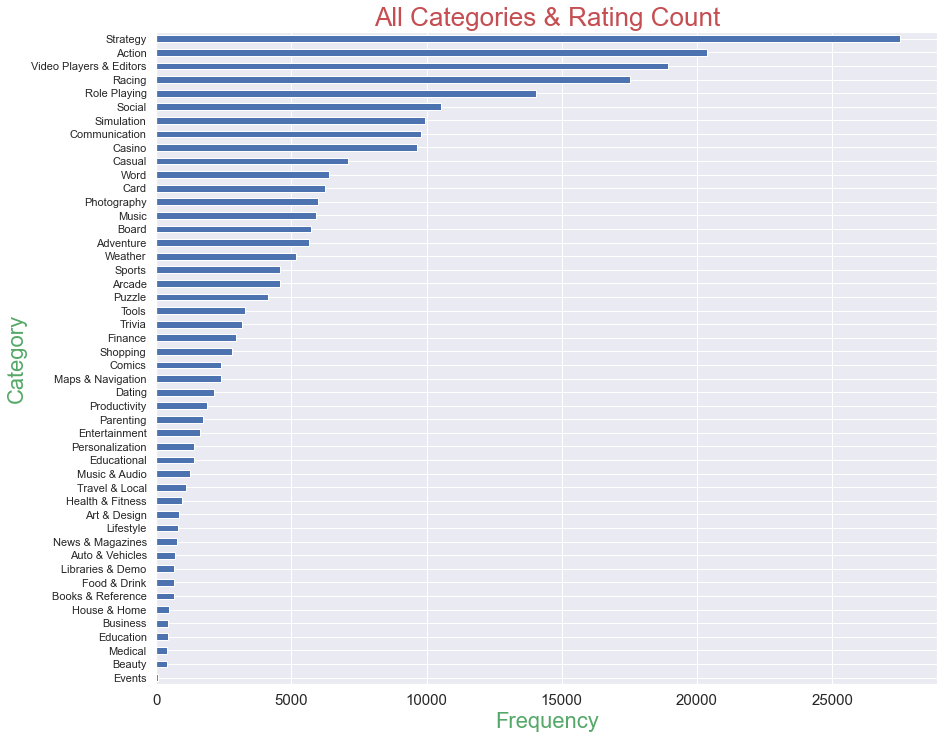

In [67]:
# We noticed that the top three apps with the highest ratings are: Action, Strategy and Racing
print()
plt.figure(figsize=(14,12))
df.groupby('Category')['Rating Count'].mean().round(0).sort_values(ascending=True).plot(kind="barh")
plt.xticks(size=15)
plt.xlabel("Frequency",size=22,c="g")
plt.ylabel("Category",size=22,c="g")
plt.title("All Categories & Rating Count",size=26,c="r")
plt.show()

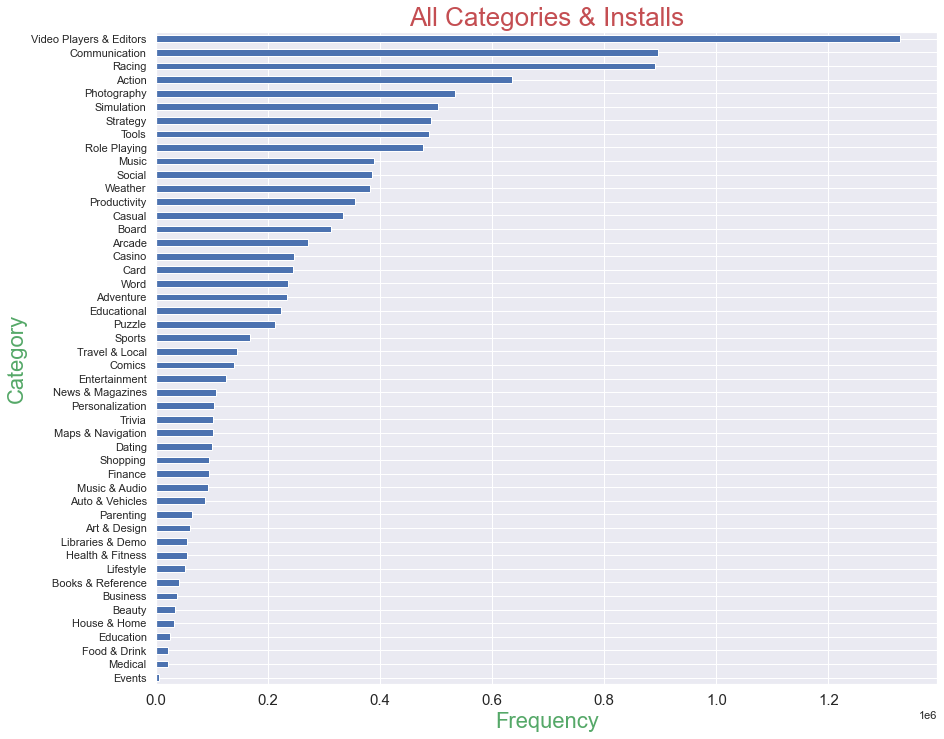

In [68]:
# We noticed that the top three categories with the highest installs are:  Video Players and Editors, Action and Racing
print()
plt.figure(figsize=(14,12))
df.groupby('Category')['Installs'].mean().round(0).sort_values(ascending=True).plot(kind="barh")
plt.xticks(size=15)
plt.xlabel("Frequency",size=22,c="g")
plt.ylabel("Category",size=22,c="g")
plt.title("All Categories & Installs",size=26,c="r")
plt.show()

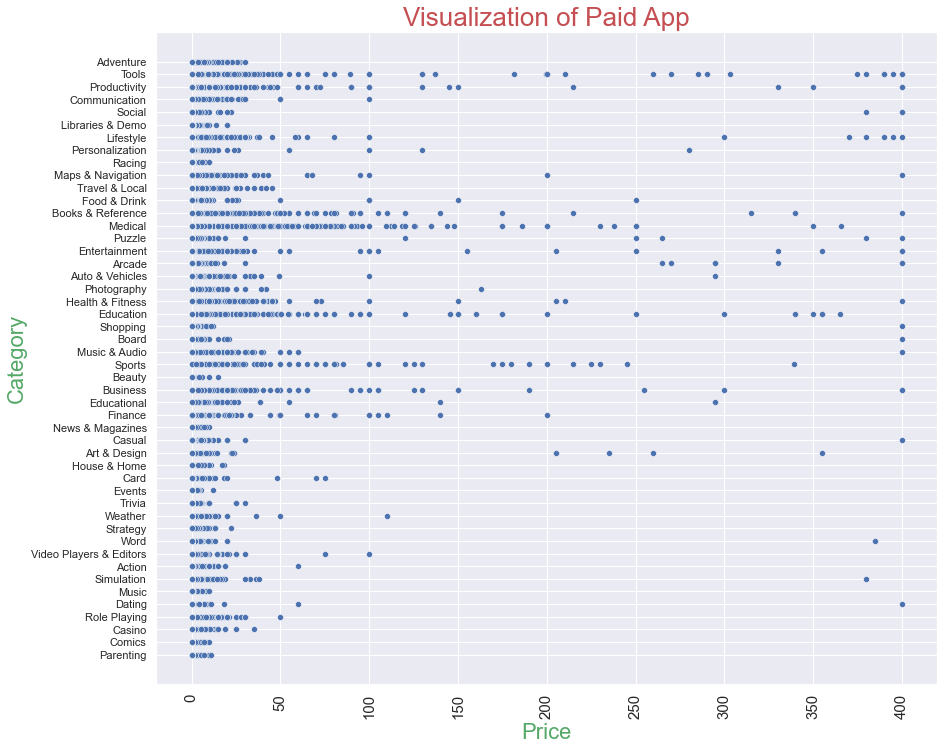

In [69]:
# We can visualize most of the apps are free or low price
# We can visualize that the most expensive apps are related to Tools and Business.

plt.figure(figsize=(14,12)) 
sns.scatterplot(data=df,y="Category",x='Price',color="b")
plt.xticks(rotation='vertical',size=15)
plt.xlabel("Price",size=22,c="g")
plt.ylabel("Category",size=22,c="g")
plt.title("Visualization of Paid App",size=26,c="r")
plt.show()

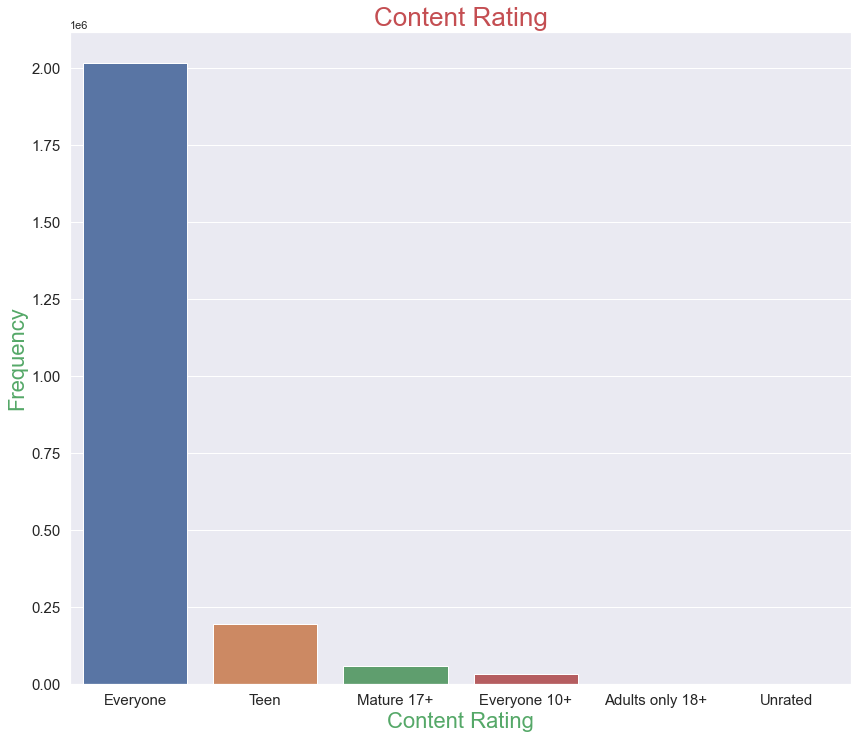

In [70]:
# We can visualize that highest Content Rating is Everyone followed by Teen and Mature 17+

plt.figure(figsize=(14,12))

sns.countplot(x="Content Rating",data=df)
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel("Content Rating",size=22,c="g")
plt.ylabel("Frequency",size=22,c="g")
plt.title("Content Rating",size=26,c="r")
plt.show()

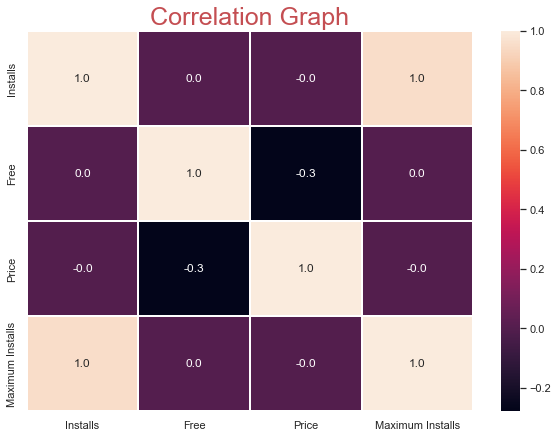

In [71]:
#We can visualize on the heatmap below that installs and maximum installs has good relation

plt.figure(figsize=(10,7))
sns.heatmap(df[["App Name","Installs","Category","Free","Price","Maximum Installs"]].corr(), annot=True,linewidths=.4,fmt='.1f')
plt.title("Correlation Graph",c="r",size=25)
plt.show()

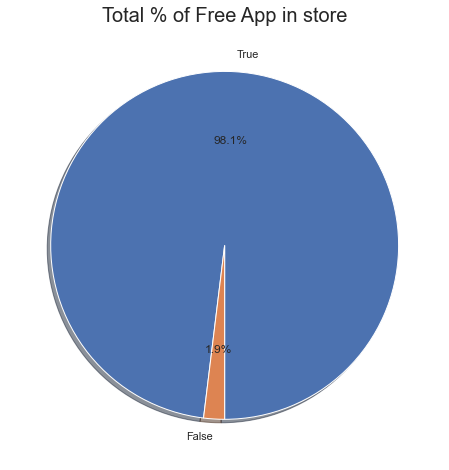

In [72]:
# We can visualize the total % of free apps in store in pie chart
plt.figure(figsize=(8,8))
labels =df['Free'].value_counts(sort = True).index
sizes = df['Free'].value_counts(sort = True)
plt.pie(sizes, labels=labels,autopct='%1.1f%%', shadow=True, startangle=270,)
plt.title('Total % of Free App in store',size = 20)
plt.show()

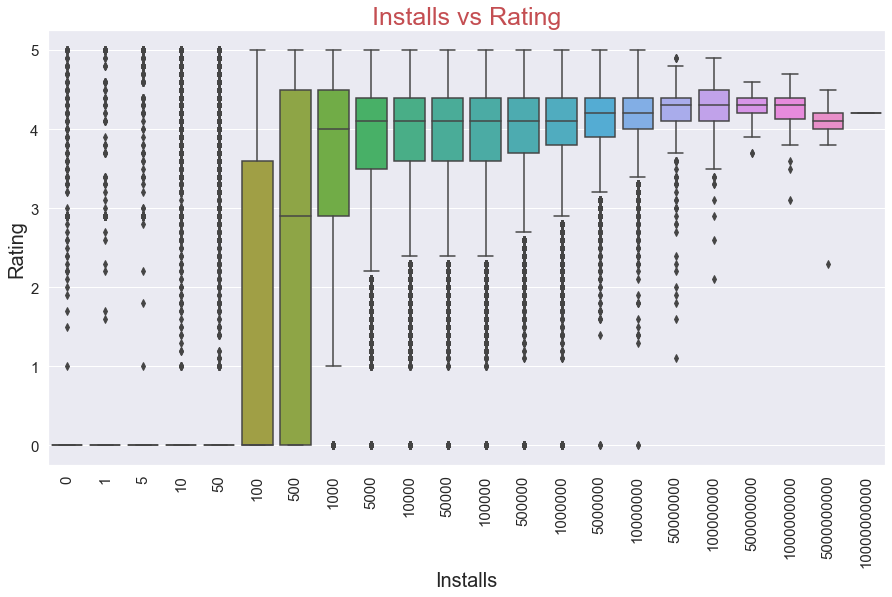

In [73]:
# We can visualize the install vs. rating boxplot
ax = plt.figure(figsize=(15,8))
sns.boxplot(x="Installs", y="Rating", data=df)
plt.title("Installs vs Rating",size=25,c="r")
plt.xticks(size=15,rotation=90)
plt.yticks(size=15)
plt.xlabel("Installs",size=20)
plt.ylabel("Rating",size=20)
plt.show()

C:\Users\alex0\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


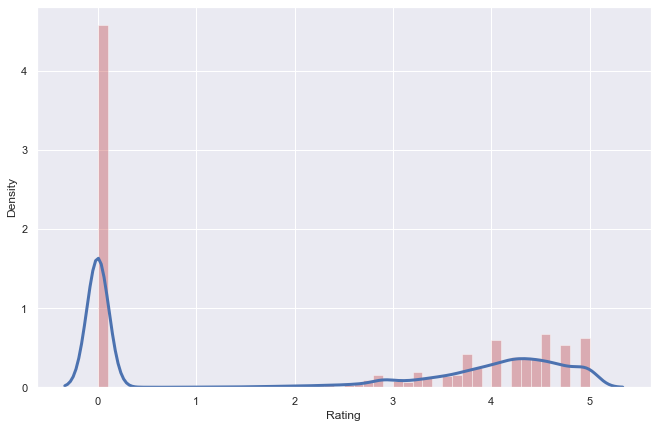

In [74]:
# We can visualize the distribution of Rating apps
plt.figure(figsize=(11,7))
plt.subplot(1,1,1)
sns.distplot(df['Rating'],color='r',kde_kws={'linewidth':3,'color':'b'});
plt.show()

0 Rating
1 Size
2 Price


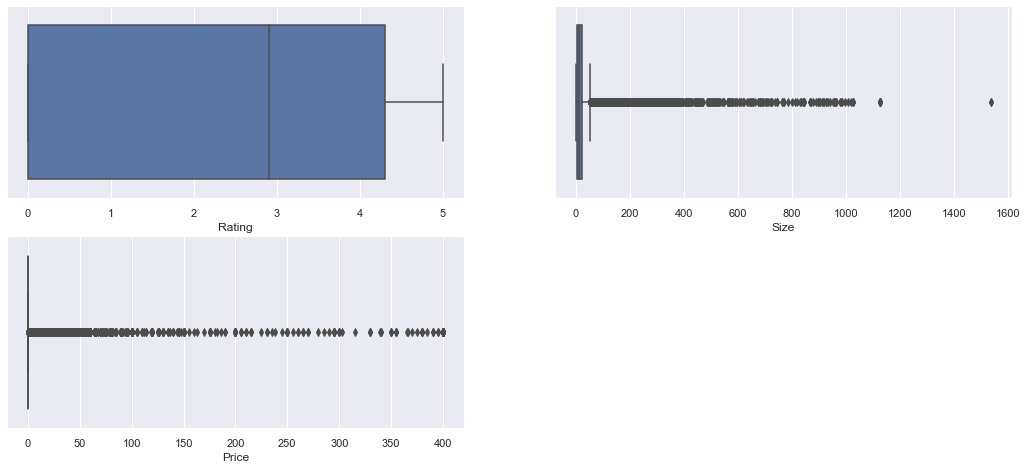

In [75]:
# We can visualize Rating, Size Price boxplot to find the outliers
col = ['Rating','Size','Price'] 
plt.figure(figsize=(18,12))
for i,v in enumerate(col):
    print(i,v)
    plt.subplot(3,2,i+1)
    sns.boxplot(x=v, data=df)
plt.show()

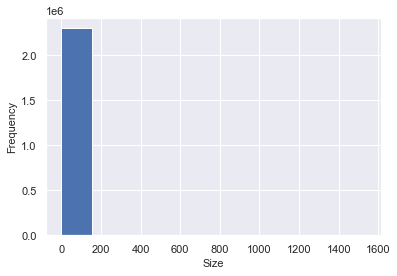

In [76]:
# We can visualize that nearly all of the app size are under 200M
plt.hist(df['Size'],bins=10)
plt.xlabel("Size",size=11)
plt.ylabel("Frequency",size=11)
plt.show()

Text(0.5, 1.0, 'Avg Price of all Categories')

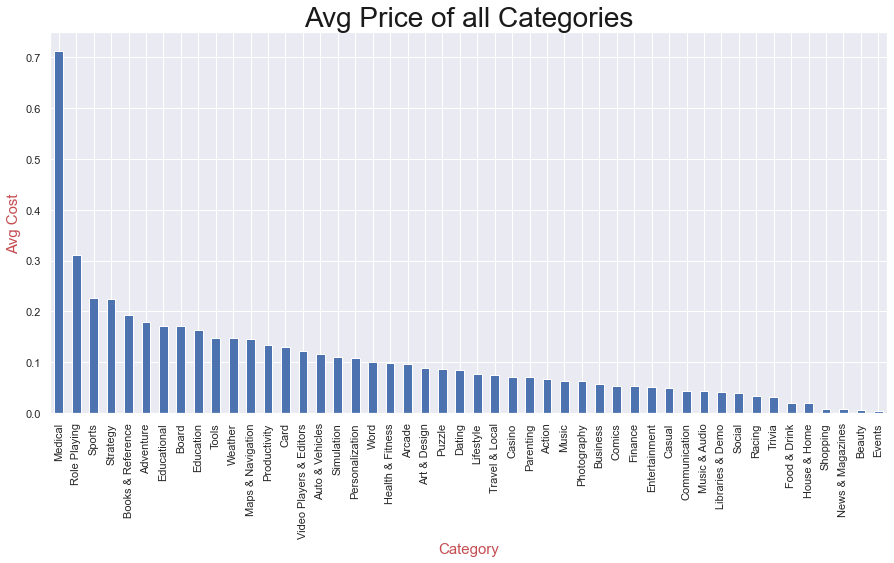

In [77]:
# We can visualize the average price of all app categories by bar plots
plt.figure(figsize=(15,7))
df.groupby("Category")['Price'].mean().sort_values(ascending=False).plot(kind="bar")
plt.xlabel("Category",size=15,c="r")
plt.ylabel("Avg Cost",size=15,c="r")
plt.title("Avg Price of all Categories",size=28,c="k")

### Building a linear regression model 

####  Choosing a sample of 5000

In [78]:
#Renaming Index
df.index.names = ['ID']

# Creating a random sample of 5000 records for the linear model  
df_sample = df.sample(5000, random_state=52)

df_sample

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice
ID,,,,,,,,,,,,,,,,,,,
1995953,Estifta,com.baqeyatollah.estifta,Books & Reference,4.7,249.0,10000,10000,20672,True,0.0,USD,6.7,4.0.3 and up,2015,2015,Everyone,False,False,False
1023959,"Blur Image - Blur Background,Photo Blur App",photoeditor.blurimage.backgroundblur,Photography,0.0,0.0,100,100,171,True,0.0,USD,3.7,4.0.3 and up,2019,2019,Everyone,True,False,False
678558,ASVAB Practice Test PRO,com.a1.quiz.asvab,Education,4.3,93.0,500,500,550,False,4.4,USD,2.4,1.6 and up,2013,2014,Everyone,False,False,False
455174,Best Gun Wallpaper HD,com.devita_software.gun_wallpaper,Personalization,0.0,0.0,100,100,147,True,0.0,USD,20.0,4.1 and up,2020,2020,Teen,True,False,False
946051,Side Bounce,com.unyongames.sidebounce,Arcade,4.1,16.0,100,100,130,True,0.0,USD,35.0,4.4 and up,2021,2021,Everyone,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1112881,Bubble Penguin Friends,com.coolgc.bubblepenguin,Casual,4.7,3368.0,100000,100000,167339,True,0.0,USD,64.0,4.2 and up,2019,2021,Everyone,True,True,False
781421,Kdz. Ereğli Belediyesi,com.sampas.android.kdzereglivatandas,Lifestyle,0.0,0.0,1000,1000,2046,True,0.0,USD,29.0,4.1 and up,2019,2019,Everyone,False,False,False
110183,Health&Med,com.secondsave.health_med,Health & Fitness,2.9,6.0,1,1,4,True,0.0,USD,10.0,Varies with device,2019,2018,Everyone,False,False,False


In [79]:
# Review correlation 
df_sample.corr()

,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Size,Released,Last Updated,Ad Supported,In App Purchases,Editors Choice
Rating,1.000000,0.033276,0.042816,0.042816,0.053526,-0.005463,-0.003815,0.043620,-0.218391,0.001133,0.187189,0.148028,0.028121
Rating Count,0.033276,1.000000,0.981027,0.981027,0.965062,0.003613,-0.002131,0.016971,-0.065143,0.024918,0.023715,0.073844,0.099198
Installs,0.042816,0.981027,1.000000,1.000000,0.985788,0.006486,-0.003579,0.019508,-0.076640,0.029793,0.033809,0.088912,0.080152
Minimum Installs,0.042816,0.981027,1.000000,1.000000,0.985788,0.006486,-0.003579,0.019508,-0.076640,0.029793,0.033809,0.088912,0.080152
Maximum Installs,0.053526,0.965062,0.985788,0.985788,1.000000,0.007957,-0.004433,0.027814,-0.082249,0.034851,0.040928,0.103653,0.125441
Free,-0.005463,0.003613,0.006486,0.006486,0.007957,1.000000,-0.540051,-0.012552,0.135230,0.113847,0.124352,-0.000274,0.004184
Price,-0.003815,-0.002131,-0.003579,-0.003579,-0.004433,-0.540051,1.000000,0.008533,-0.092524,-0.095402,-0.072244,0.004254,-0.002260
Size,0.043620,0.016971,0.019508,0.019508,0.027814,-0.012552,0.008533,1.000000,0.121120,0.208603,-0.065443,0.183279,0.042573
Released,-0.218391,-0.065143,-0.076640,-0.076640,-0.082249,0.135230,-0.092524,0.121120,1.000000,0.513638,0.034420,-0.040730,-0.025655
Last Updated,0.001133,0.024918,0.029793,0.029793,0.034851,0.113847,-0.095402,0.208603,0.513638,1.000000,-0.016103,0.072850,0.024031


### Analysing Target Variable - 'Maximum Installs'

#### We can observe that maximum installs has a high correlation with rating count, installs and minimum installs

In [80]:
# Creating a new data frame for the regression
df_InstallsRegression=df_sample.copy()
df_InstallsRegression = df_InstallsRegression[['Installs','Maximum Installs','Minimum Installs','Rating','Rating Count',]]
df_InstallsRegression.head()

,Installs,Maximum Installs,Minimum Installs,Rating,Rating Count
ID,,,,,
1995953,10000,20672,10000,4.7,249.0
1023959,100,171,100,0.0,0.0
678558,500,550,500,4.3,93.0
455174,100,147,100,0.0,0.0
946051,100,130,100,4.1,16.0


### Scale Independent Numerical Variables

In [81]:
# Creating a random sample of 5000 records for the linear model  
df_sample = df.sample(5000, random_state=52)


In [82]:
df_gpInstallsRegression=df_sample.copy()
df_gpInstallsRegression = df_gpInstallsRegression[['Maximum Installs','Minimum Installs','Rating','Rating Count']]
df_gpInstallsRegression.head()

,Maximum Installs,Minimum Installs,Rating,Rating Count
ID,,,,
1995953,20672,10000,4.7,249.0
1023959,171,100,0.0,0.0
678558,550,500,4.3,93.0
455174,147,100,0.0,0.0
946051,130,100,4.1,16.0


In [83]:
#Create a list of the numerical variables to scale (exclude dependents)
to_scale =  ['Minimum Installs','Rating Count','Rating']

#To use this library, we need to convert a pandas dataframe into a numpy array by doing the following:
InstallsRegressionarray = df_gpInstallsRegression[to_scale].values

#Create a min max scaler - this sets all values between 0 and 1 within the numpy array
data_scaler = StandardScaler().fit(InstallsRegressionarray) 

#Apply the scaler and overwrite the data into the existing dataframe
df_scaled = pd.DataFrame(data_scaler.fit_transform(InstallsRegressionarray), columns = to_scale)

df_gpInstallsRegression['Minimum Installs'] = df_scaled['Minimum Installs'].values
df_gpInstallsRegression['Rating Count'] = df_scaled['Rating Count'].values

df_gpInstallsRegression.head()

,Maximum Installs,Minimum Installs,Rating,Rating Count
ID,,,,
1995953,20672,-0.040135,4.7,-0.027071
1023959,171,-0.046843,0.0,-0.033605
678558,550,-0.046572,4.3,-0.031165
455174,147,-0.046843,0.0,-0.033605
946051,130,-0.046843,4.1,-0.033185


count    5.000000e+03
mean     1.203906e+05
std      2.034428e+06
min      0.000000e+00
25%      8.600000e+01
50%      8.045000e+02
75%      7.865750e+03
max      1.323696e+08
Name: Maximum Installs, dtype: float64




C:\Users\alex0\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


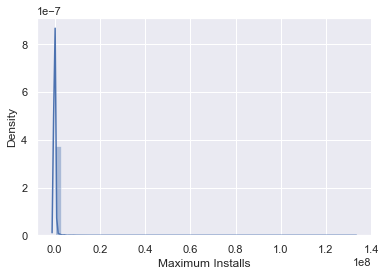

In [84]:
#Analizing the target variable
print(df_gpInstallsRegression['Maximum Installs'].describe()) # describing output (target) variable
print('\n') # new line command
ax = sns.distplot(df_gpInstallsRegression['Maximum Installs']) #checking the distribution of the output variable

### Scatter Plots: Relationship with Numerical Variables

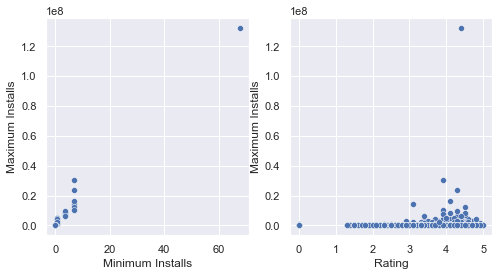

In [85]:
#scatter plot to check how selected two variables are related to saleprice

fig, axs = plt.subplots(ncols=2, figsize= (8, 4)) # Divides the plotting area into sub-ares 
                                 
plt.subplot(1, 2, 1) # indicates there are one row two columns and this is the first plot
ax = sns.scatterplot(x='Minimum Installs', y='Maximum Installs', data=df_gpInstallsRegression) # scatter plot 

plt.subplot(1, 2, 2) # indicates there are one row two columns and this is the second plot
ax = sns.scatterplot(x='Rating', y='Maximum Installs', data=df_gpInstallsRegression) # scatter plot 


### Fiting the model

In [86]:
#Create and defining the target variable
target_col= 'Maximum Installs'

#Determing the input variables
input_col= list(set(df_gpInstallsRegression.columns)-set(['Maximum Installs']))

# Creating a linear regression function
model = LinearRegression()

model.fit(df_gpInstallsRegression[input_col],df_gpInstallsRegression[target_col])

#Prints the model coefficients
print('Model coefficients:')
print(model.coef_)

#Prints the R2 value of the model
print('\n')
print('R2 value:'+ str(round(model.score(df_gpInstallsRegression[input_col],df_gpInstallsRegression[target_col]),2)))
print('\n')

#Calculating the residuals and then print the results
pred_vs_actual= pd.DataFrame()
pred_vs_actual['actual']=df_gpInstallsRegression[target_col]
pred_vs_actual['predicted']=np.round(model.predict(df_gpInstallsRegression[input_col]),6)
pred_vs_actual['error']=pred_vs_actual['actual']-pred_vs_actual['predicted']
print(pred_vs_actual.head())

Model coefficients:
[-104315.52831021 2106701.77731683   10589.11967905]


R2 value:0.97


         actual     predicted         error
ID                                         
1995953   20672  64913.517403 -44241.517403
1023959     171   1695.109628  -1524.109628
678558      550  47544.710128 -46994.710128
455174      147   1695.109628  -1548.109628
946051      130  45066.703495 -44936.703495


### Assesing the model

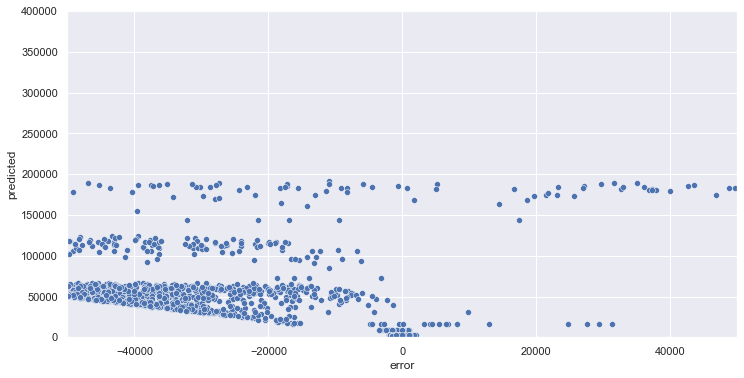

In [87]:
fig, ax = plt.subplots(figsize=(12,6)) # Determines the figure size
ax = sns.scatterplot(x='error', y='predicted', data=pred_vs_actual) 
#plots the error vs. predicted
limits = ax.set(xlim=(-50000, 50000), ylim=(0, 400000)) #sets the limit for x and y axis

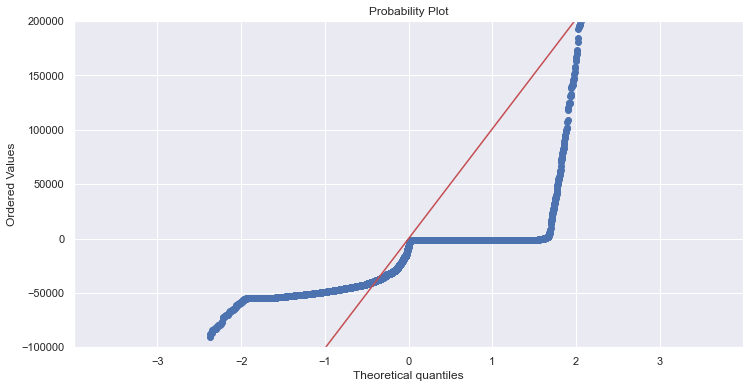

In [88]:
fig, ax = plt.subplots(figsize=(12,6)) # Determines the figure size


_, (__, ___, r) = sp.stats.probplot(pred_vs_actual['error'], plot=ax, fit=True) 
# generates the normality plot

limits = ax.set(ylim=(-100000, 200000)) # sets the limits for the graph

### Reviewing R and errors

In [89]:
P=df_gpInstallsRegression.loc[:,df_gpInstallsRegression.columns!=target_col]
R=df_gpInstallsRegression.loc[:,target_col]

In [90]:
P=sm.add_constant(P)
model=sm.OLS(R,P)

C:\Users\alex0\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [91]:
results=model.fit()
results.params

const               9.687382e+04
Minimum Installs    2.106702e+06
Rating              1.058912e+04
Rating Count       -1.043155e+05
dtype: float64

In [92]:
# Summary Table - Regression Model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       Maximum Installs   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                 5.782e+04
Date:                Sun, 26 Jun 2022   Prob (F-statistic):               0.00
Time:                        12:38:10   Log-Likelihood:                -70783.
No. Observations:                5000   AIC:                         1.416e+05
Df Residuals:                    4996   BIC:                         1.416e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             9.687e+04   7029.758  

### Multiple Regression Model - Rating Count

In [93]:
df_RatingsRegression=df_sample.copy()
df_RatingsRegression = df_RatingsRegression[['Rating Count','Maximum Installs','Minimum Installs','Rating']]
df_RatingsRegression.head()

,Rating Count,Maximum Installs,Minimum Installs,Rating
ID,,,,
1995953,249.0,20672,10000,4.7
1023959,0.0,171,100,0.0
678558,93.0,550,500,4.3
455174,0.0,147,100,0.0
946051,16.0,130,100,4.1


### Scale Independent Numerical Variables

In [94]:
to_scale =  ['Maximum Installs','Minimum Installs','Rating']

#To use this library, we need to convert a pandas dataframe into a numpy array by doing the following:
RatingsRegressionarray = df_RatingsRegression[to_scale].values

data_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

df_scaled = pd.DataFrame(data_scaler.fit_transform(RatingsRegressionarray), columns = to_scale)

df_RatingsRegression['Minimum Installs'] = df_scaled['Minimum Installs'].values
df_RatingsRegression['Maximum Installs'] = df_scaled['Maximum Installs'].values

df_RatingsRegression.head()

,Rating Count,Maximum Installs,Minimum Installs,Rating
ID,,,,
1995953,249.0,1.561688e-04,0.000100,4.7
1023959,0.0,1.291837e-06,0.000001,0.0
678558,93.0,4.155032e-06,0.000005,4.3
455174,0.0,1.110527e-06,0.000001,0.0
946051,16.0,9.820985e-07,0.000001,4.1


### Fiting the model

In [95]:
#Determine the model

target = 'Rating Count'

#determines the input variables
input_col= list(set(df_RatingsRegression.columns)-set(['Rating Count']))

model= LinearRegression()

model.fit(df_RatingsRegression[input_col],df_RatingsRegression[target])

#prints the model coefficients
print('Model coefficients:')
print(model.coef_)

# prints the R2 value of the model
print('\n')
print('R2 value:'+ str(round(model.score(df_RatingsRegression[input_col],df_RatingsRegression[target]),2)))
print('\n')
# calculate the residuals and print the results
pred_vs_actual= pd.DataFrame()
pred_vs_actual['actual']=df_RatingsRegression[target]
pred_vs_actual['predicted']=np.round(model.predict(df_RatingsRegression[input_col]),6)
pred_vs_actual['error']=pred_vs_actual['actual']-pred_vs_actual['predicted']
print(pred_vs_actual.head())

Model coefficients:
[-1.69791798e+05  2.70822400e+06 -1.45136846e+02]


R2 value:0.96


         actual   predicted       error
ID                                     
1995953   249.0 -555.513114  804.513114
1023959     0.0 -115.187280  115.187280
678558     93.0 -728.928970  821.928970
455174      0.0 -115.156495  115.156495
946051     16.0 -710.195758  726.195758


### Assesing the model

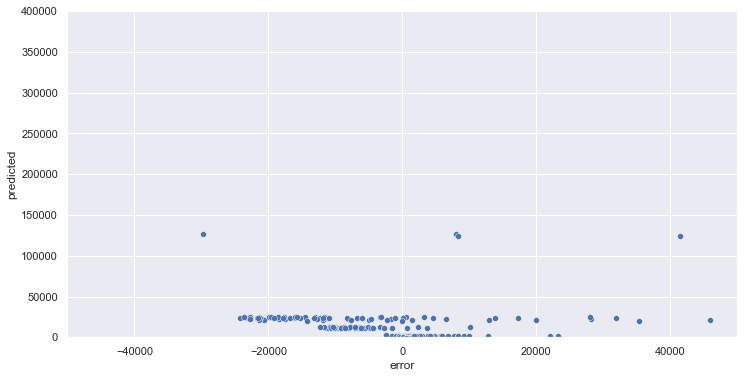

In [96]:
fig, ax = plt.subplots(figsize=(12,6)) # Determines the figure size
ax = sns.scatterplot(x='error', y='predicted', data=pred_vs_actual) 
#plots the error vs. predicted
limits = ax.set(xlim=(-50000, 50000), ylim=(0, 400000)) #sets the limit for x and y axis

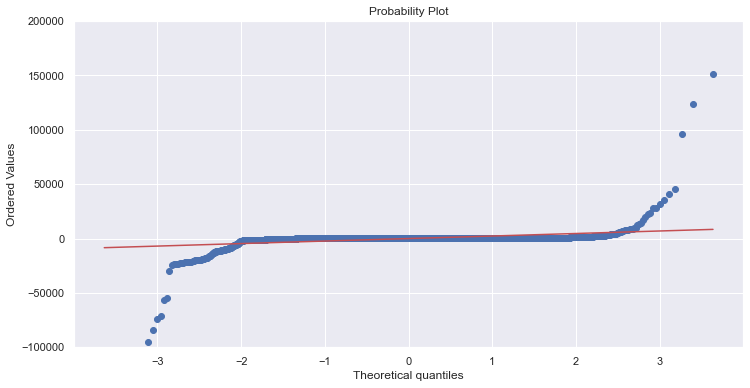

In [97]:
fig, ax = plt.subplots(figsize=(12,6)) # Determines the figure size


_, (__, ___, r) = sp.stats.probplot(pred_vs_actual['error'], plot=ax, fit=True) 
# generates the normality plot

limits = ax.set(ylim=(-100000, 200000)) # sets the limits for the graph

### Logistic Regression - Free or Paid

In [98]:
#Create a list of variables that will categorized (Category & Content Rating)
categorical_dummies = list(set(df[['Category', 'Content Rating','Ad Supported','In App Purchases','Editors Choice']].columns))

#Create dummy variables using onehot encoding
dummy_cat_df = pd.get_dummies(df[categorical_dummies], drop_first=True) 

#Drops categorical variables from the df_googleplay
df = df.drop(categorical_dummies, axis = 1) 

#Adds the newly created dummy variables
df = pd.concat([df, dummy_cat_df], axis = 1)

df.head()

,App Name,App Id,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,...,Category_Simulation,Category_Social,Category_Sports,Category_Strategy,Category_Tools,Category_Travel & Local,Category_Trivia,Category_Video Players & Editors,Category_Weather,Category_Word
ID,,,,,,,,,,,,,,,,,,,,,
0,Gakondo,com.ishakwe.gakondo,0.0,0.0,10,10,15,True,0.0,USD,...,0,0,0,0,0,0,0,0,0,0
1,Ampere Battery Info,com.webserveis.batteryinfo,4.4,64.0,5000,5000,7662,True,0.0,USD,...,0,0,0,0,1,0,0,0,0,0
2,Vibook,com.doantiepvien.crm,0.0,0.0,50,50,58,True,0.0,USD,...,0,0,0,0,0,0,0,0,0,0
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,5.0,5.0,10,10,19,True,0.0,USD,...,0,0,0,0,0,0,0,0,0,0
4,GROW.me,com.horodyski.grower,0.0,0.0,100,100,478,True,0.0,USD,...,0,0,0,0,1,0,0,0,0,0


In [99]:
# Create dummy variables using onehot encoding

dummy_free = pd.get_dummies(df, columns=['Free'], prefix=None, prefix_sep='.', drop_first=True)

In [100]:
dummy_free.head()

,App Name,App Id,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Price,Currency,Size,...,Category_Social,Category_Sports,Category_Strategy,Category_Tools,Category_Travel & Local,Category_Trivia,Category_Video Players & Editors,Category_Weather,Category_Word,Free.True
ID,,,,,,,,,,,,,,,,,,,,,
0,Gakondo,com.ishakwe.gakondo,0.0,0.0,10,10,15,0.0,USD,10.0,...,0,0,0,0,0,0,0,0,0,1
1,Ampere Battery Info,com.webserveis.batteryinfo,4.4,64.0,5000,5000,7662,0.0,USD,2.9,...,0,0,0,1,0,0,0,0,0,1
2,Vibook,com.doantiepvien.crm,0.0,0.0,50,50,58,0.0,USD,3.7,...,0,0,0,0,0,0,0,0,0,1
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,5.0,5.0,10,10,19,0.0,USD,1.8,...,0,0,0,0,0,0,0,0,0,1
4,GROW.me,com.horodyski.grower,0.0,0.0,100,100,478,0.0,USD,6.2,...,0,0,0,1,0,0,0,0,0,1


In [101]:
#Rename it 
df.rename(columns = {'Free.True':'Free'}, inplace = True)

In [102]:
df.head()

,App Name,App Id,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,...,Category_Simulation,Category_Social,Category_Sports,Category_Strategy,Category_Tools,Category_Travel & Local,Category_Trivia,Category_Video Players & Editors,Category_Weather,Category_Word
ID,,,,,,,,,,,,,,,,,,,,,
0,Gakondo,com.ishakwe.gakondo,0.0,0.0,10,10,15,True,0.0,USD,...,0,0,0,0,0,0,0,0,0,0
1,Ampere Battery Info,com.webserveis.batteryinfo,4.4,64.0,5000,5000,7662,True,0.0,USD,...,0,0,0,0,1,0,0,0,0,0
2,Vibook,com.doantiepvien.crm,0.0,0.0,50,50,58,True,0.0,USD,...,0,0,0,0,0,0,0,0,0,0
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,5.0,5.0,10,10,19,True,0.0,USD,...,0,0,0,0,0,0,0,0,0,0
4,GROW.me,com.horodyski.grower,0.0,0.0,100,100,478,True,0.0,USD,...,0,0,0,0,1,0,0,0,0,0


In [103]:
list(df.columns)

['App Name',
 'App Id',
 'Rating',
 'Rating Count',
 'Installs',
 'Minimum Installs',
 'Maximum Installs',
 'Free',
 'Price',
 'Currency',
 'Size',
 'Minimum Android',
 'Released',
 'Last Updated',
 'Editors Choice',
 'Ad Supported',
 'In App Purchases',
 'Content Rating_Everyone',
 'Content Rating_Everyone 10+',
 'Content Rating_Mature 17+',
 'Content Rating_Teen',
 'Content Rating_Unrated',
 'Category_Adventure',
 'Category_Arcade',
 'Category_Art & Design',
 'Category_Auto & Vehicles',
 'Category_Beauty',
 'Category_Board',
 'Category_Books & Reference',
 'Category_Business',
 'Category_Card',
 'Category_Casino',
 'Category_Casual',
 'Category_Comics',
 'Category_Communication',
 'Category_Dating',
 'Category_Education',
 'Category_Educational',
 'Category_Entertainment',
 'Category_Events',
 'Category_Finance',
 'Category_Food & Drink',
 'Category_Health & Fitness',
 'Category_House & Home',
 'Category_Libraries & Demo',
 'Category_Lifestyle',
 'Category_Maps & Navigation',
 'Categ

In [104]:
df['Free']

ID
0          True
1          True
2          True
3          True
4          True
           ... 
2312939    True
2312940    True
2312941    True
2312942    True
2312943    True
Name: Free, Length: 2306277, dtype: bool

In [105]:
dummy_free.head()

,App Name,App Id,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Price,Currency,Size,...,Category_Social,Category_Sports,Category_Strategy,Category_Tools,Category_Travel & Local,Category_Trivia,Category_Video Players & Editors,Category_Weather,Category_Word,Free.True
ID,,,,,,,,,,,,,,,,,,,,,
0,Gakondo,com.ishakwe.gakondo,0.0,0.0,10,10,15,0.0,USD,10.0,...,0,0,0,0,0,0,0,0,0,1
1,Ampere Battery Info,com.webserveis.batteryinfo,4.4,64.0,5000,5000,7662,0.0,USD,2.9,...,0,0,0,1,0,0,0,0,0,1
2,Vibook,com.doantiepvien.crm,0.0,0.0,50,50,58,0.0,USD,3.7,...,0,0,0,0,0,0,0,0,0,1
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,5.0,5.0,10,10,19,0.0,USD,1.8,...,0,0,0,0,0,0,0,0,0,1
4,GROW.me,com.horodyski.grower,0.0,0.0,100,100,478,0.0,USD,6.2,...,0,0,0,1,0,0,0,0,0,1


### Scale Independent variables

In [106]:
df_LogisticRegression=dummy_free.copy()
df_LogisticRegression = df_LogisticRegression[['Free.True', 'Minimum Installs','Maximum Installs','Rating Count','Installs','Price','Size']]
df_LogisticRegression.head()

,Free.True,Minimum Installs,Maximum Installs,Rating Count,Installs,Price,Size
ID,,,,,,,
0,1,10,15,0.0,10,0.0,10.0
1,1,5000,7662,64.0,5000,0.0,2.9
2,1,50,58,0.0,50,0.0,3.7
3,1,10,19,5.0,10,0.0,1.8
4,1,100,478,0.0,100,0.0,6.2


In [107]:
#Creating a list of the numerical variables
to_scale =  ['Rating Count','Minimum Installs','Maximum Installs', 'Price', 'Size']

LogisticRegressionarray = df_LogisticRegression[to_scale].values

#Min Max scaler
data_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

#Overwriting the data 
df_scaled = pd.DataFrame(data_scaler.fit_transform(LogisticRegressionarray), columns = to_scale)

df_LogisticRegression['Rating Count'] = df_scaled['Rating Count'].values
df_LogisticRegression['Minimum Installs'] = df_scaled['Minimum Installs'].values
df_LogisticRegression['Maximum Installs'] = df_scaled['Maximum Installs'].values
df_LogisticRegression['Price'] = df_scaled['Price'].values
df_LogisticRegression['Size'] = df_scaled['Size'].values


df_LogisticRegression.head()

,Free.True,Minimum Installs,Maximum Installs,Rating Count,Installs,Price,Size
ID,,,,,,,
0,1,1.000000e-09,1.244026e-09,0.000000e+00,10,0.0,0.006508
1,1,5.000000e-07,6.354484e-07,4.619019e-07,5000,0.0,0.001886
2,1,5.000000e-09,4.810233e-09,0.000000e+00,50,0.0,0.002407
3,1,1.000000e-09,1.575766e-09,3.608608e-08,10,0.0,0.001170
4,1,1.000000e-08,3.964296e-08,0.000000e+00,100,0.0,0.004034


### Fiting the model

In [108]:
X=df_LogisticRegression.loc[:,['Size','Minimum Installs','Maximum Installs','Rating Count']]
Y=df_LogisticRegression.loc[:,'Free.True']

In [109]:
# Test train split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size= 0.70, random_state=42)

In [110]:
lr=LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr')
lr.fit(X_train,Y_train)

LogisticRegression(multi_class='ovr', random_state=0)

In [111]:
def get_performance (actual_Y, pred_Y):
    cm=confusion_matrix(actual_Y, pred_Y)
    total=sum(sum(cm))
    accuracy= (cm[0,0]+cm[1,1])/total
    sensitivity=cm[0,0]/(cm[0,0]+cm[0,1])
    specificity= cm[1,1]/(cm[1,0]+cm[1,1])
    return accuracy, sensitivity, specificity

In [112]:
pred_Y_lr=lr.predict(X_test)
print(pred_Y_lr)

[1 1 1 ... 1 1 1]


In [113]:
accuracy_lr,sensitivity_lr,specificity_lr=get_performance(Y_test, pred_Y_lr)

### Assesing the model

#### Accuracy table

In [114]:
perf=pd.DataFrame ([accuracy_lr],columns=['accuracy'],index=['Logistic Regression'])
perf['sensitivity']= np.asarray([sensitivity_lr])
perf['specificity']=np.asarray([specificity_lr])
perf

,accuracy,sensitivity,specificity
Logistic Regression,0.980627,0.0,1.0


In [115]:
Y_test.values

array([1, 1, 1, ..., 1, 0, 1], dtype=uint8)

In [116]:
score_Y_dt=lr.predict_proba(X_test)
score_Y_dt

array([[0.02092686, 0.97907314],
       [0.01927557, 0.98072443],
       [0.01897595, 0.98102405],
       ...,
       [0.02027036, 0.97972964],
       [0.01976683, 0.98023317],
       [0.01924863, 0.98075137]])

### ROC Curve

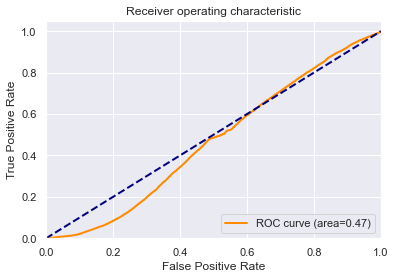

In [117]:
score_Y_dt=lr.predict_proba(X_test)
fpr,tpr,_=roc_curve(Y_test,score_Y_dt[:,1])
roc_auc= auc(fpr,tpr)

plt.figure()
lw=2
plt.plot(fpr,tpr, color='darkorange', lw=lw, label='ROC curve (area=%0.2f)'% roc_auc)
plt.plot([0,1],[0,1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### Confusion Matrix

Text(66.5, 0.5, 'Truth')

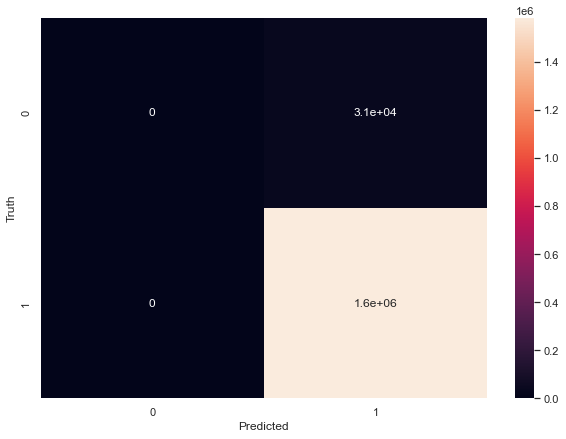

In [118]:
cmlogit = confusion_matrix(Y_test,pred_Y_lr)
plt.figure(figsize=(10,7))
sns.heatmap(cmlogit, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')